# 1. Instal Dependensi mengatur Pengaturan dan Download Dataset

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Hindari kesalahan OOM dengan mengatur Pertumbuhan Konsumsi Memori GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# Mendownload Dataset
!wget -O /content/dataset.zip https://www.dropbox.com/scl/fi/0ffrs6z22jkubi8ivpyq0/dataset-happy-sad.zip?rlkey=hbcxfafi1cu4a1u7yr3roiumy&dl=0
!unzip -q dataset.zip -d /content/data

--2023-11-19 11:06:21--  https://www.dropbox.com/scl/fi/0ffrs6z22jkubi8ivpyq0/dataset-happy-sad.zip?rlkey=hbcxfafi1cu4a1u7yr3roiumy
Resolving www.dropbox.com (www.dropbox.com)... 162.125.13.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.13.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucea6c4fad511776adade8dfd2a8.dl.dropboxusercontent.com/cd/0/inline/CH3SD6JpNdcSzuTKtouFcIjpMd6aPEHmiyflj4ULQwPff_zKPIWvkhS6gsTBwlcDyfuMWwnFY1gKiZr0Yh3J8EOpvbkRTG9AEUz29qbE4zXXmOjJLWRTQBnEuLxw0GreTmWhAL4VCRXrq9824dbWCwsH/file# [following]
--2023-11-19 11:06:22--  https://ucea6c4fad511776adade8dfd2a8.dl.dropboxusercontent.com/cd/0/inline/CH3SD6JpNdcSzuTKtouFcIjpMd6aPEHmiyflj4ULQwPff_zKPIWvkhS6gsTBwlcDyfuMWwnFY1gKiZr0Yh3J8EOpvbkRTG9AEUz29qbE4zXXmOjJLWRTQBnEuLxw0GreTmWhAL4VCRXrq9824dbWCwsH/file
Resolving ucea6c4fad511776adade8dfd2a8.dl.dropboxusercontent.com (ucea6c4fad511776adade8dfd2a8.dl.dropboxusercontent.com)... 162.125.

# **Data Preprocessing**

# 1. Menghapus gambar yang tidak jelas

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png','GIF']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/data/sad/sad-person-pictures-2560-x-1707-a8ginomrbkhyh3ri.jpg
Image not in ext list /content/data/sad/sad-person-pictures-2bnso9uiwlhrikrx.jpg
Image not in ext list /content/data/sad/origin-144.jpg
Image not in ext list /content/data/sad/stock-photo-sad-person-sketch-art-on-paper-2301532683.jpg
Image not in ext list /content/data/happy/sjnv_cnh7ugnaddm7so6sq.jpg
Image not in ext list /content/data/happy/happiness_thumbnail.jpg
Image not in ext list /content/data/happy/Happy20People.jpg
Image not in ext list /content/data/happy/2560px-Happy_People.jpg
Image not in ext list /content/data/happy/220px-Happy_People_A_Year_in_the_Taiga_poster.jpg
Image not in ext list /content/data/happy/guilherme-stecanella-375176-unsplash.jpg


# 2. Memuat Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/data')

Found 8615 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
batch = data_iterator.next()

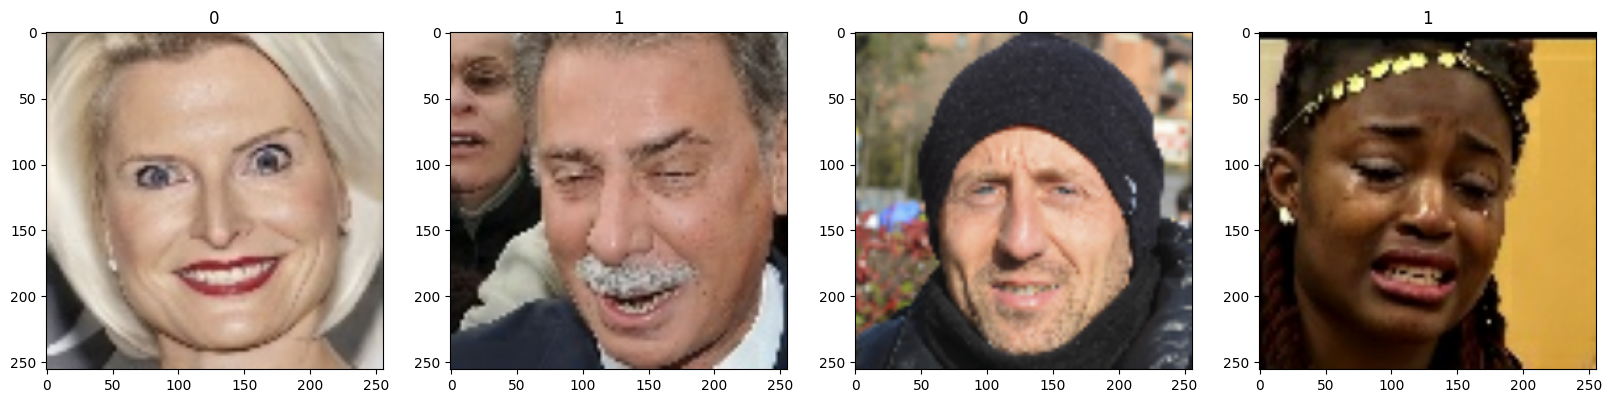

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 3. Skala Data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

(array([[[[7.25490212e-01, 7.49019623e-01, 5.60784340e-01],
          [7.24754930e-01, 7.50000000e-01, 5.60784340e-01],
          [7.20343113e-01, 7.55882382e-01, 5.60784340e-01],
          ...,
          [9.86764729e-01, 1.00000000e+00, 9.95588243e-01],
          [9.77941155e-01, 1.00000000e+00, 9.92647052e-01],
          [9.76470590e-01, 1.00000000e+00, 9.92156863e-01]],
 
         [[7.21078455e-01, 7.45343149e-01, 5.56372523e-01],
          [7.20128655e-01, 7.46001840e-01, 5.56112111e-01],
          [7.14430153e-01, 7.49954045e-01, 5.54549634e-01],
          ...,
          [9.85661745e-01, 9.99586403e-01, 9.95863974e-01],
          [9.76102948e-01, 9.99310672e-01, 9.93106604e-01],
          [9.74509776e-01, 9.99264717e-01, 9.92647052e-01]],
 
         [[6.94607854e-01, 7.23284304e-01, 5.29901981e-01],
          [6.92371309e-01, 7.22012877e-01, 5.28079033e-01],
          [6.78952217e-01, 7.14384198e-01, 5.17141521e-01],
          ...,
          [9.79044139e-01, 9.97104764e-01, 9.9751

# 4. Split Data

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [ ]:
train_size

189

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

#**Data Processing**

# Membangun Deep Learning Model

In [ ]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

#  Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
189/189 [==============================] - 33s 116ms/step - loss: 0.2935 - accuracy: 0.8886 - val_loss: 0.1425 - val_accuracy: 0.9502
Epoch 2/20
189/189 [==============================] - 22s 116ms/step - loss: 0.1065 - accuracy: 0.9661 - val_loss: 0.1032 - val_accuracy: 0.9682
Epoch 3/20
189/189 [==============================] - 21s 110ms/step - loss: 0.0733 - accuracy: 0.9770 - val_loss: 0.0973 - val_accuracy: 0.9699
Epoch 4/20
189/189 [==============================] - 22s 114ms/step - loss: 0.0461 - accuracy: 0.9858 - val_loss: 0.0949 - val_accuracy: 0.9670
Epoch 5/20
189/189 [==============================] - 26s 136ms/step - loss: 0.0314 - accuracy: 0.9901 - val_loss: 0.1133 - val_accuracy: 0.9763
Epoch 6/20
189/189 [==============================] - 32s 168ms/step - loss: 0.0185 - accuracy: 0.9940 - val_loss: 0.1301 - val_accuracy: 0.9774
Epoch 7/20
189/189 [==============================] - 22s 114ms/step - loss: 0.0183 - accuracy: 0.9957 - val_loss: 0.1222 - val_ac

#  Performa Plot

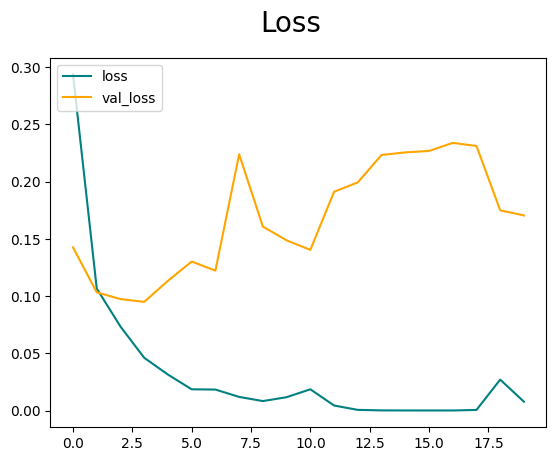

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

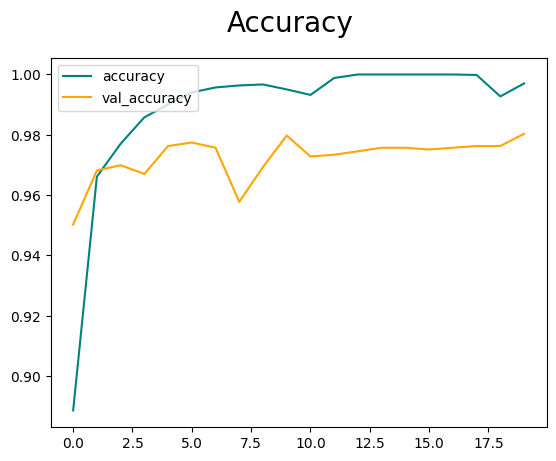

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Mengevaluasi

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 228ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9583333, shape=(), dtype=float32) tf.Tensor(0.98355263, shape=(), dtype=float32) tf.Tensor(0.9785459, shape=(), dtype=float32)


# Test

In [ ]:
import cv2

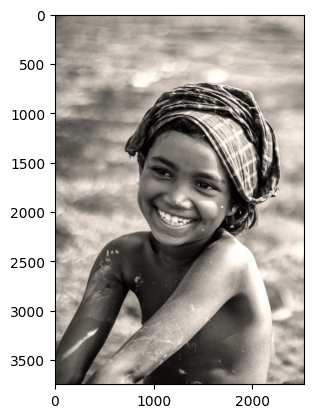

In [ ]:
img = cv2.imread('blind-man-h5H6S0qoI8o-unsplash.jpg')
plt.imshow(img)
plt.show()

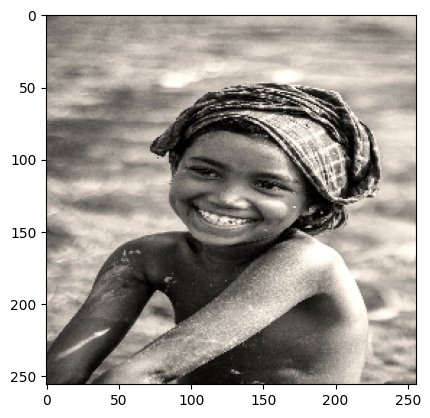

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 19ms/step


In [ ]:
yhat

array([[0.00900919]], dtype=float32)

In [ ]:
if yhat > 0.5:
    print(f'Kelas yang diprediksi adalah Sedih')
else:
    print(f'Kelas yang diprediksi adalah Bahagia')

Kelas yang diprediksi adalah Bahagia


In [ ]:
# Save Model
model.save(os.path.join('models','imageclassifier.h5'))

# **Menjalankan Model Yang Telah Didownload**


Setelah model disimpan maka model di upload ke penyimpanan cloud disini saya menggunakan dropbox, tujuannya yaitu agar tidak usah repot lagi mengapload model dari drive laptop/pc secara manual.

In [ ]:
#Import Library
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os

In [ ]:
# Mendownload Model Yang Sebelumnya Telah Disave dan Di upload ke Cloud
!wget -O /content/imageclassifier.h5 https://www.dropbox.com/scl/fi/4iznhy3ov2ti2uebucm8i/imageclassifier.h5?rlkey=45j789zohuwwa7fn6nuyhleim&dl=0

--2023-11-19 10:59:31--  https://www.dropbox.com/scl/fi/4iznhy3ov2ti2uebucm8i/imageclassifier.h5?rlkey=45j789zohuwwa7fn6nuyhleim
Resolving www.dropbox.com (www.dropbox.com)... 162.125.85.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.85.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucc92846b87a5ed1e5b9fb1ec9c2.dl.dropboxusercontent.com/cd/0/inline/CH2wQ6p04XyxJWG_LZL9Dnj7PmN-JXUUXT1iTpFLwP6kUzx41sbHfgfch8l2PzDmUDgFttLfZUnTzJv2TSZrAXJej-rwuNOZEAu0zHGgocPvYgiVXjSbYWEiQ22h2BgDyxQ3xK5VvbbsEY714AIG7osQ/file# [following]
--2023-11-19 10:59:32--  https://ucc92846b87a5ed1e5b9fb1ec9c2.dl.dropboxusercontent.com/cd/0/inline/CH2wQ6p04XyxJWG_LZL9Dnj7PmN-JXUUXT1iTpFLwP6kUzx41sbHfgfch8l2PzDmUDgFttLfZUnTzJv2TSZrAXJej-rwuNOZEAu0zHGgocPvYgiVXjSbYWEiQ22h2BgDyxQ3xK5VvbbsEY714AIG7osQ/file
Resolving ucc92846b87a5ed1e5b9fb1ec9c2.dl.dropboxusercontent.com (ucc92846b87a5ed1e5b9fb1ec9c2.dl.dropboxusercontent.com)... 162.125.13.

In [ ]:
#Memuat Model
new_model = load_model('imageclassifier.h5')

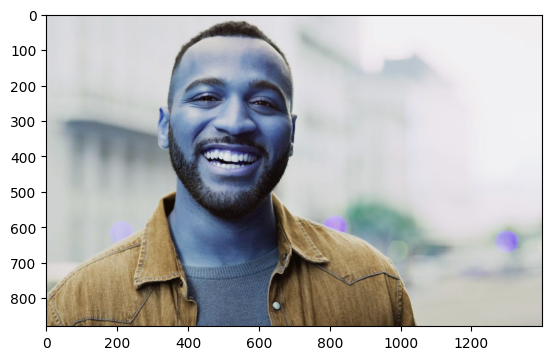

In [ ]:
#Import Gambar
img = cv2.imread('05-12-21-happy-people.jpg')
plt.imshow(img)
plt.show()

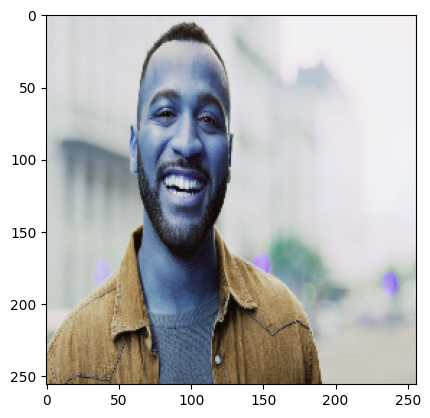

In [ ]:
#Resize Gambar
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
#Menghitung Nilai Prediksi Model
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [ ]:
#Nilai Prediksi
yhatnew

array([[0.00218279]], dtype=float32)

In [ ]:
#Memprediksi Kelas
if yhatnew > 0.5:
    print(f'Kelas yang diprediksi adalah Sedih')
else:
    print(f'Kelas yang diprediksi adalah Bahagia')

Kelas yang diprediksi adalah Bahagia


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load gambar untuk pengujian
test_image_path = '/content/05-12-21-happy-people.jpg'  # Ganti dengan path gambar yang ingin diuji
test_image = image.load_img(test_image_path, target_size=(256, 256))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0  # Normalisasi gambar

# Prediksi kelas
predictions = new_model(test_image)
predicted_class = np.argmax(predictions, axis=1)

# Daftar nama kelas yang mungkin (sesuai dengan urutan output softmax pada model)
class_names = ['sad', 'happy']  # Ganti dengan nama kelas sesuai dengan model Anda

# Menampilkan hasil prediksi
print(f'Probabilitas kelas: {predictions}')
print(f'Kelas yang diprediksi adalah: {class_names[predicted_class[0]]}')

Probabilitas kelas: [[0.00079879]]
Kelas yang diprediksi adalah: sad
